# Fill in outs v2
## August

I don't really need to compute the whole sequence of outs, I really just need to know if play in an out at first!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
import os

# Matt written files
from src.utils import *
from src.plotting import Baseball_Field
from src.game import Game

In [2]:
# pandas options
pd.set_option('display.max_columns', None)
pd.options.mode.chained_assignment = None  # default='warn'

## Pull the sample game that I know a lot about already

Distance between ball and player is large on average, should maybe clean up 12.199183415462679


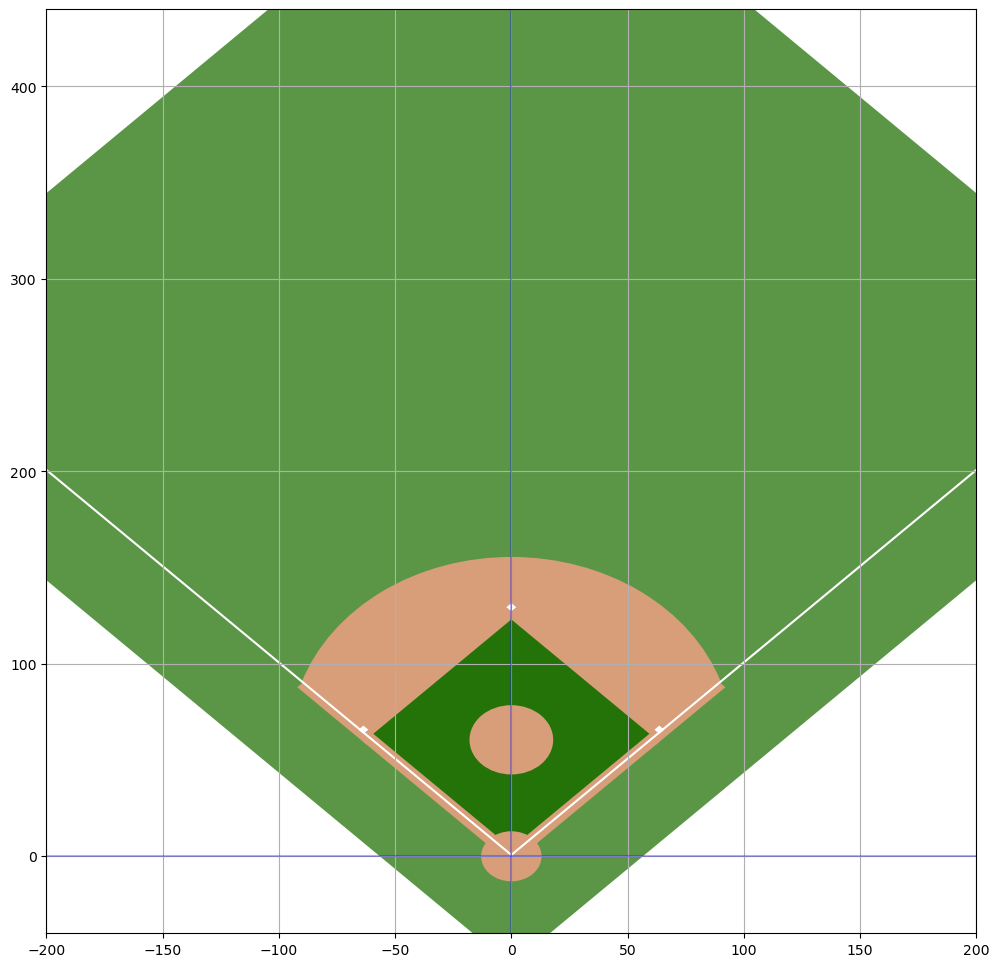

In [3]:
bf_1903_01 = Baseball_Field("1903_01_TeamNE_TeamA2")

In [4]:
game_info_1903_01 = bf_1903_01.game_obj.game_info_df.copy()
game_events_1903_01 = bf_1903_01.game_obj.game_events_df.copy()


game_events_1903_01.head()

,game_str,play_id,at_bat,play_per_game,timestamp,player_position,event_code,event,next_event_code,next_event,next_event_ts,prev_event_code,prev_event,prev_event_ts,xy_throw_angle,elevation_throw_angle,throw_velo,batter_dist_to_first,thrower_x,thrower_y,ball_position_x,ball_position_y,ball_position_z,batter_x,batter_y,player_id
0,1903_01_TeamNE_TeamA2,1,1,1,19199,1,1,pitch,2.0,ball acquired,19661.0,NaN,NaN,NaN,NaN,NaN,NaN,89.076422,NaN,NaN,-2.387367,54.28680,6.37134,2.5305,-1.1700,2171
1,1903_01_TeamNE_TeamA2,1,1,1,19661,2,2,ball acquired,5.0,end of play,19661.0,1.0,pitch,19199.0,NaN,NaN,NaN,89.076422,NaN,NaN,-2.034057,-4.11549,3.61398,2.5305,-1.1700,2790
2,1903_01_TeamNE_TeamA2,1,1,1,19661,0,5,end of play,NaN,NaN,NaN,2.0,ball acquired,19661.0,NaN,NaN,NaN,89.076422,NaN,NaN,-2.034057,-4.11549,3.61398,2.5305,-1.1700,NaN
3,1903_01_TeamNE_TeamA2,2,1,2,29858,1,1,pitch,2.0,ball acquired,30320.0,NaN,NaN,NaN,NaN,NaN,NaN,89.114508,NaN,NaN,-2.288160,52.87770,6.40401,2.3136,-1.0173,2171
4,1903_01_TeamNE_TeamA2,2,1,2,30320,2,2,ball acquired,5.0,end of play,30320.0,1.0,pitch,29858.0,NaN,NaN,NaN,89.114508,NaN,NaN,-0.469218,-5.52300,0.34590,2.3136,-1.0173,2790


In [5]:
game_info_1903_01["is_out_at_first"] = np.nan
game_info_1903_01.head()

,game_str,home_team,away_team,at_bat,play_per_game,inning,top_bottom_inning,pitcher,catcher,first_base,second_base,third_base,shortstop,left_field,center_field,right_field,batter,first_baserunner,second_baserunner,third_baserunner,n_br,prev_outs,this_play_outs,trust_this_play,Batter,Runner 1st,Runner 2nd,Runner 3rd,player_pos_and_info_agree,valid_half,trust_this_half,is_out_at_first
0,1903_01_TeamNE_TeamA2,TeamA2,TeamNE,1,1,1,Top,2171,2790,2526,2053,2382,1972,1557,1751,2973,4474,0,0,0,0,0.0,0.0,1,1.0,0.0,0.0,0.0,1,1,1,NaN
1,1903_01_TeamNE_TeamA2,TeamA2,TeamNE,1,2,1,Top,2171,2790,2526,2053,2382,1972,1557,1751,2973,4474,0,0,0,0,0.0,0.0,1,1.0,0.0,0.0,0.0,1,1,1,NaN
2,1903_01_TeamNE_TeamA2,TeamA2,TeamNE,1,3,1,Top,2171,2790,2526,2053,2382,1972,1557,1751,2973,4474,0,0,0,0,0.0,0.0,1,1.0,0.0,0.0,0.0,1,1,1,NaN
3,1903_01_TeamNE_TeamA2,TeamA2,TeamNE,1,4,1,Top,2171,2790,2526,2053,2382,1972,1557,1751,2973,4474,0,0,0,0,0.0,0.0,1,1.0,0.0,0.0,0.0,1,1,1,NaN
4,1903_01_TeamNE_TeamA2,TeamA2,TeamNE,1,5,1,Top,2171,2790,2526,2053,2382,1972,1557,1751,2973,4474,0,0,0,0,0.0,0.0,1,1.0,0.0,0.0,0.0,1,1,1,NaN


In [80]:
this_half_inning = game_info_1903_01.loc[
    # (game_info_1903_01["inning"] == 2) &
    # (game_info_1903_01["top_bottom_inning"] == "Top"),
    :
]

this_half_inning

,game_str,home_team,away_team,at_bat,play_per_game,inning,top_bottom_inning,pitcher,catcher,first_base,second_base,third_base,shortstop,left_field,center_field,right_field,batter,first_baserunner,second_baserunner,third_baserunner,n_br,prev_outs,this_play_outs,trust_this_play,Batter,Runner 1st,Runner 2nd,Runner 3rd,player_pos_and_info_agree,valid_half,trust_this_half,is_out_at_first
0,1903_01_TeamNE_TeamA2,TeamA2,TeamNE,1,1,1,Top,2171,2790,2526,2053,2382,1972,1557,1751,2973,4474,0,0,0,0,0.0,0.0,1,1.0,0.0,0.0,0.0,1,1,1,NaN
1,1903_01_TeamNE_TeamA2,TeamA2,TeamNE,1,2,1,Top,2171,2790,2526,2053,2382,1972,1557,1751,2973,4474,0,0,0,0,0.0,0.0,1,1.0,0.0,0.0,0.0,1,1,1,NaN
2,1903_01_TeamNE_TeamA2,TeamA2,TeamNE,1,3,1,Top,2171,2790,2526,2053,2382,1972,1557,1751,2973,4474,0,0,0,0,0.0,0.0,1,1.0,0.0,0.0,0.0,1,1,1,NaN
3,1903_01_TeamNE_TeamA2,TeamA2,TeamNE,1,4,1,Top,2171,2790,2526,2053,2382,1972,1557,1751,2973,4474,0,0,0,0,0.0,0.0,1,1.0,0.0,0.0,0.0,1,1,1,NaN
4,1903_01_TeamNE_TeamA2,TeamA2,TeamNE,1,5,1,Top,2171,2790,2526,2053,2382,1972,1557,1751,2973,4474,0,0,0,0,0.0,0.0,1,1.0,0.0,0.0,0.0,1,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,1903_01_TeamNE_TeamA2,TeamA2,TeamNE,82,323,9,Top,2592,2790,2526,2053,2382,1972,1557,1751,2973,9762,0,3790,0,1,0.0,1.0,1,1.0,0.0,1.0,0.0,1,1,0,NaN
319,1903_01_TeamNE_TeamA2,TeamA2,TeamNE,83,324,9,Top,2592,2790,2526,2053,2382,1972,1557,1751,2973,6803,0,3790,0,1,1.0,0.0,0,1.0,0.0,0.0,0.0,0,1,0,NaN
320,1903_01_TeamNE_TeamA2,TeamA2,TeamNE,83,325,9,Top,2592,2790,2526,2053,2382,1972,1557,1751,2973,6803,0,3790,0,1,1.0,0.0,1,1.0,0.0,1.0,0.0,1,1,0,NaN
321,1903_01_TeamNE_TeamA2,TeamA2,TeamNE,83,326,9,Top,2592,2790,2526,2053,2382,1972,1557,1751,2973,6803,0,3790,0,1,1.0,1.0,1,1.0,0.0,1.0,0.0,1,1,0,NaN


In [68]:
def is_out_at_first(half_inning_df, seq, empty_cell_index, allowable_throw_angle = 7, allowable_first_base_dist=15):
    """
    The meat of the outs sequence solver -- given a game state and a proposed number of outs, 
    this function returns a bool for whether this arrangement is possible


    """
    # Assuming we have consecutive indices in half_inning_df!

    # define some lists for convenience
    all_batting_team = ["batter", "first_baserunner", "second_baserunner", "third_baserunner"]
    all_br = ["first_baserunner", "second_baserunner", "third_baserunner"]

    seq_len = seq.shape[0]

    old_set_batting_team = set()
    # prev_total_outs = 0a

    if empty_cell_index != 0:
        # you need to set and check all of the things that look at the prev row 
        old_set_batting_team = set(half_inning_df.iloc[empty_cell_index - 1][all_batting_team])
        #prev_total_outs = sum(seq[empty_cell_index - 1, :])

    # importantly, the data here are ints or sets of ints
    next_batter = None
    next_set_batting_team = set()
    next_set_br = set()
    next_second_br = None
    next_third_br = None

    # the play_per_game of HRs within this game
    hr_play_per_games = bf_1903_01.game_obj.get_play_id_and_ppg_for_event("home run")["play_per_game"].values

    
    
    """
    # technically, these aren't all flyouts that end the play (e.g. it could be a single, that an outfielder eats)
    # but every flyout should be here (unless, there are many plays that end after an outfielder throws it in)
    flyouts_that_end_play = bf_1903_01.game_obj.get_play_id_and_ppg_for_event(
        "ball acquired", 
        player_position=[7, 8, 9],
        next_event="end of play")["play_per_game"].values
    """
    
    
     # if there is a next play to pick from
    if empty_cell_index < seq_len - 1:
        next_batter = half_inning_df.iloc[empty_cell_index + 1]["batter"]
        next_set_batting_team = set(half_inning_df.iloc[empty_cell_index + 1][all_batting_team])
        next_set_br = set(half_inning_df.iloc[empty_cell_index + 1][all_br])

        next_second_br = half_inning_df.iloc[empty_cell_index + 1]["second_baserunner"]
        next_third_br = half_inning_df.iloc[empty_cell_index + 1]["third_baserunner"]

    # again, the data here are ints or sets of ints
    this_batter = half_inning_df.iloc[empty_cell_index]["batter"]
    this_set_br = set(half_inning_df.iloc[empty_cell_index][all_br])
    this_first_br = half_inning_df.iloc[empty_cell_index]["first_baserunner"]
    this_second_br = half_inning_df.iloc[empty_cell_index]["second_baserunner"]
    this_third_br = half_inning_df.iloc[empty_cell_index]["third_baserunner"]
    this_set_batting_team = set(half_inning_df.iloc[empty_cell_index][all_batting_team])

    # do we have the same batter on the next play
    same_batter_next_play = this_batter == next_batter

    # how many outs we would have if we assigned this_play_outs to this index
    # does_this_make_3 = prev_total_outs + this_play_outs
    this_play_per_game = half_inning_df.iloc[empty_cell_index]["play_per_game"]

    
    this_play_events = game_events_1903_01.loc[
        (game_events_1903_01["play_per_game"] == this_play_per_game),
        :
    ]
    # to make a useful spot for breakpoints
    pass 


    if same_batter_next_play:
        return 0
    
    if this_play_per_game in hr_play_per_games:
        return 0
    
    
    ## compute the distance the ball is away from first when acquire
    any_acqs_near_first = any(this_play_events.loc[
        (this_play_events["event"] == "ball acquired") &
        (this_play_events["player_position"] == 3),
        ["ball_position_x", "ball_position_y"]
    ].apply(lambda row: np.sqrt((row["ball_position_x"] - FIRST_BASE_COORDS[0])**2 +
                                (row["ball_position_y"] - FIRST_BASE_COORDS[1])**2)
                                , axis=1) < allowable_first_base_dist
    )    


    
    
    # maybe need something for player position and event at the same time?
    if ("ball hit into play" in this_play_events["event"].values) and\
        ("ball bounce" in this_play_events["event"].values) and\
        ("throw (ball-in-play)" in this_play_events["event"].values) and\
        ("ball acquired" in this_play_events["event"].values) and\
        any(this_play_events["xy_throw_angle"] < allowable_throw_angle) and\
        any_acqs_near_first and\
        (this_batter not in next_set_batting_team):
         
        return 1
    
    
    # not outs at first, throws towards first
    if ("ball hit into play" in this_play_events["event"].values) and\
        ("ball bounce" in this_play_events["event"].values) and\
        ("throw (ball-in-play)" in this_play_events["event"].values) and\
        ("ball acquired" in this_play_events["event"].values) and\
        any(this_play_events["xy_throw_angle"] < allowable_throw_angle) and\
        any_acqs_near_first and\
        (this_batter in next_set_batting_team):
        
        return -1
    
    
    
    return 0
         

In [81]:
this_half_inning.shape[0]

323

In [82]:
running_outs_seq = np.full((this_half_inning.shape[0], 1), -99)

for ii in range(this_half_inning.shape[0]):
    running_outs_seq[ii] = is_out_at_first(this_half_inning, this_half_inning["is_out_at_first"], ii)


In [84]:
this_half_inning["is_out_at_first"] = running_outs_seq

In [85]:
this_half_inning.loc[
    (this_half_inning["is_out_at_first"] == 1),
    :
]

,game_str,home_team,away_team,at_bat,play_per_game,inning,top_bottom_inning,pitcher,catcher,first_base,second_base,third_base,shortstop,left_field,center_field,right_field,batter,first_baserunner,second_baserunner,third_baserunner,n_br,prev_outs,this_play_outs,trust_this_play,Batter,Runner 1st,Runner 2nd,Runner 3rd,player_pos_and_info_agree,valid_half,trust_this_half,is_out_at_first
9,1903_01_TeamNE_TeamA2,TeamA2,TeamNE,2,10,1,Top,2171,2790,2526,2053,2382,1972,1557,1751,2973,3790,4474,0,0,1,0.0,2.0,1,1.0,1.0,0.0,0.0,1,1,1,1
17,1903_01_TeamNE_TeamA2,TeamA2,TeamNE,4,18,1,Bottom,8523,7071,5616,6993,9762,6000,3790,4474,7148,1972,0,0,0,0,0.0,1.0,1,1.0,0.0,0.0,0.0,1,1,0,1
37,1903_01_TeamNE_TeamA2,TeamA2,TeamNE,9,38,1,Bottom,8523,7071,5616,6993,9762,6000,3790,4474,7148,1297,2526,0,2053,2,2.0,1.0,1,1.0,1.0,0.0,1.0,1,1,0,1
57,1903_01_TeamNE_TeamA2,TeamA2,TeamNE,13,58,2,Top,2171,2790,2526,2053,2382,1972,1557,1751,2973,6000,6993,0,0,1,2.0,1.0,1,1.0,1.0,0.0,0.0,1,1,1,1
116,1903_01_TeamNE_TeamA2,TeamA2,TeamNE,29,117,3,Bottom,8523,7071,5616,6993,9762,6000,3790,4474,7148,2382,0,0,2790,1,-99.0,-99.0,1,1.0,0.0,0.0,1.0,1,1,0,1
118,1903_01_TeamNE_TeamA2,TeamA2,TeamNE,30,119,4,Top,2171,2790,2526,2053,2382,1972,1557,1751,2973,6803,0,0,0,0,0.0,1.0,1,1.0,0.0,0.0,0.0,1,1,1,1
123,1903_01_TeamNE_TeamA2,TeamA2,TeamNE,32,124,4,Top,2171,2790,2526,2053,2382,1972,1557,1751,2973,6993,5616,0,0,1,1.0,2.0,1,1.0,1.0,0.0,0.0,1,1,1,1
182,1903_01_TeamNE_TeamA2,TeamA2,TeamNE,46,184,5,Top,2171,2790,2526,2053,2382,1972,1557,1751,2973,3790,4474,6000,0,2,-99.0,-99.0,1,1.0,1.0,1.0,0.0,1,1,0,1
183,1903_01_TeamNE_TeamA2,TeamA2,TeamNE,47,185,5,Bottom,4044,7071,5616,6993,9762,6000,3790,4474,7148,1751,0,0,0,0,0.0,1.0,1,1.0,0.0,0.0,0.0,1,1,1,1
222,1903_01_TeamNE_TeamA2,TeamA2,TeamNE,58,224,6,Bottom,4044,7071,5616,6993,9762,6000,3790,4474,7148,2053,0,0,0,0,1.0,1.0,1,1.0,0.0,0.0,0.0,1,1,1,1


In [86]:
this_half_inning.loc[
    (this_half_inning["is_out_at_first"] == -1),
    :
]

,game_str,home_team,away_team,at_bat,play_per_game,inning,top_bottom_inning,pitcher,catcher,first_base,second_base,third_base,shortstop,left_field,center_field,right_field,batter,first_baserunner,second_baserunner,third_baserunner,n_br,prev_outs,this_play_outs,trust_this_play,Batter,Runner 1st,Runner 2nd,Runner 3rd,player_pos_and_info_agree,valid_half,trust_this_half,is_out_at_first
147,1903_01_TeamNE_TeamA2,TeamA2,TeamNE,39,149,4,Bottom,6437,7071,5616,6993,9762,6000,3790,4474,7148,1297,2526,2053,1557,3,1.0,1.0,1,1.0,1.0,1.0,1.0,1,1,1,-1


In [87]:
this_half_inning = game_info_1903_01.loc[
    (game_info_1903_01["inning"] == 4) &
    (game_info_1903_01["top_bottom_inning"] == "Bottom"),
    :
]

this_half_inning

,game_str,home_team,away_team,at_bat,play_per_game,inning,top_bottom_inning,pitcher,catcher,first_base,second_base,third_base,shortstop,left_field,center_field,right_field,batter,first_baserunner,second_baserunner,third_baserunner,n_br,prev_outs,this_play_outs,trust_this_play,Batter,Runner 1st,Runner 2nd,Runner 3rd,player_pos_and_info_agree,valid_half,trust_this_half,is_out_at_first
124,1903_01_TeamNE_TeamA2,TeamA2,TeamNE,33,125,4,Bottom,8523,7071,5616,6993,9762,6000,3790,4474,7148,1751,0,0,0,0,0.0,0.0,1,1.0,0.0,0.0,0.0,1,1,1,NaN
125,1903_01_TeamNE_TeamA2,TeamA2,TeamNE,34,126,4,Bottom,8523,7071,5616,6993,9762,6000,3790,4474,7148,1972,0,0,1751,1,0.0,0.0,1,1.0,0.0,0.0,1.0,1,1,1,NaN
126,1903_01_TeamNE_TeamA2,TeamA2,TeamNE,34,127,4,Bottom,8523,7071,5616,6993,9762,6000,3790,4474,7148,1972,0,0,1751,1,0.0,0.0,1,1.0,0.0,0.0,1.0,1,1,1,NaN
127,1903_01_TeamNE_TeamA2,TeamA2,TeamNE,34,128,4,Bottom,8523,7071,5616,6993,9762,6000,3790,4474,7148,1972,0,0,1751,1,0.0,0.0,1,1.0,0.0,0.0,1.0,1,1,1,NaN
128,1903_01_TeamNE_TeamA2,TeamA2,TeamNE,34,129,4,Bottom,8523,7071,5616,6993,9762,6000,3790,4474,7148,1972,0,0,1751,1,0.0,1.0,1,1.0,0.0,0.0,1.0,1,1,1,NaN
129,1903_01_TeamNE_TeamA2,TeamA2,TeamNE,35,130,4,Bottom,8523,7071,5616,6993,9762,6000,3790,4474,7148,2973,0,0,0,0,1.0,0.0,1,1.0,0.0,0.0,0.0,1,1,1,NaN
130,1903_01_TeamNE_TeamA2,TeamA2,TeamNE,36,131,4,Bottom,8523,7071,5616,6993,9762,6000,3790,4474,7148,1557,2973,0,0,1,1.0,0.0,1,1.0,1.0,0.0,0.0,1,1,1,NaN
131,1903_01_TeamNE_TeamA2,TeamA2,TeamNE,36,132,4,Bottom,8523,7071,5616,6993,9762,6000,3790,4474,7148,1557,2973,0,0,1,1.0,0.0,1,1.0,1.0,0.0,0.0,1,1,1,NaN
132,1903_01_TeamNE_TeamA2,TeamA2,TeamNE,36,133,4,Bottom,8523,7071,5616,6993,9762,6000,3790,4474,7148,1557,2973,0,0,1,1.0,0.0,1,1.0,1.0,0.0,0.0,1,1,1,NaN
133,1903_01_TeamNE_TeamA2,TeamA2,TeamNE,36,134,4,Bottom,8523,7071,5616,6993,9762,6000,3790,4474,7148,1557,2973,0,0,1,1.0,0.0,1,1.0,1.0,0.0,0.0,1,1,1,NaN


In [76]:
this_play_per_game = 62

this_play_events = game_events_1903_01.loc[
    (game_events_1903_01["play_per_game"] == this_play_per_game),
    :


]
this_play_events

,game_str,play_id,at_bat,play_per_game,timestamp,player_position,event_code,event,next_event_code,next_event,next_event_ts,prev_event_code,prev_event,prev_event_ts,xy_throw_angle,elevation_throw_angle,throw_velo,batter_dist_to_first,thrower_x,thrower_y,ball_position_x,ball_position_y,ball_position_z,batter_x,batter_y,player_id
228,1903_01_TeamNE_TeamA2,62,15,62,1828723,1,1,pitch,4.0,ball hit into play,1829119.0,NaN,NaN,NaN,NaN,NaN,NaN,91.688236,NaN,NaN,-1.840272,53.082900,6.453630,-2.7060,0.3546,8523
229,1903_01_TeamNE_TeamA2,62,15,62,1829119,10,4,ball hit into play,5.0,end of play,1829416.0,1.0,pitch,1828723.0,NaN,NaN,NaN,91.671577,NaN,NaN,-0.994572,2.456205,2.363433,-2.6970,0.3693,2382
230,1903_01_TeamNE_TeamA2,62,15,62,1829416,0,5,end of play,NaN,NaN,NaN,4.0,ball hit into play,1829119.0,NaN,NaN,NaN,91.659347,NaN,NaN,NaN,NaN,NaN,-2.6904,0.3801,NaN


In [95]:
bf_1903_01.clear_plot()

play_id = bf_1903_01.game_obj.get_pid_from_ppg(185)

#bf_1903_01.plot_all_components(play_id=play_id)
#bf_1903_01.fig


# bf_1903_01.create_gif(play_id=play_id, tag="--4-3 out at first")

MovieWriter ffmpeg unavailable; using Pillow instead.


## A game where the labels the other way are quite wrong!

In [96]:
bf_1902_14 = Baseball_Field("1902_14_TeamMK_TeamB")

In [97]:
game_info_1902_14 = bf_1902_14.game_obj.game_info_df.copy()
game_events_1902_14 = bf_1902_14.game_obj.game_events_df.copy()


game_events_1902_14.head()

,game_str,play_id,at_bat,play_per_game,timestamp,player_position,event_code,event,next_event_code,next_event,next_event_ts,prev_event_code,prev_event,prev_event_ts,xy_throw_angle,elevation_throw_angle,throw_velo,batter_dist_to_first,thrower_x,thrower_y,ball_position_x,ball_position_y,ball_position_z,batter_x,batter_y,player_id
0,1902_14_TeamMK_TeamB,1,1.0,1,37685,1,1,pitch,2.0,ball acquired,38135.0,NaN,NaN,NaN,NaN,NaN,NaN,92.401813,NaN,NaN,2.365131,52.539600,5.996640,-3.3918,0.0402,1493
1,1902_14_TeamMK_TeamB,1,1.0,1,38135,2,2,ball acquired,5.0,end of play,38135.0,1.0,pitch,37685.0,NaN,NaN,NaN,92.401813,NaN,NaN,-0.513330,-2.735877,2.342760,-3.3918,0.0402,2925
2,1902_14_TeamMK_TeamB,1,1.0,1,38135,0,5,end of play,NaN,NaN,NaN,2.0,ball acquired,38135.0,NaN,NaN,NaN,92.401813,NaN,NaN,-0.513330,-2.735877,2.342760,-3.3918,0.0402,NaN
3,1902_14_TeamMK_TeamB,2,1.0,2,48485,1,1,pitch,2.0,ball acquired,48985.0,NaN,NaN,NaN,NaN,NaN,NaN,92.092806,NaN,NaN,2.543262,58.204500,6.187110,-3.3156,0.4092,1493
4,1902_14_TeamMK_TeamB,2,1.0,2,48985,2,2,ball acquired,5.0,end of play,48985.0,1.0,pitch,48485.0,NaN,NaN,NaN,92.092806,NaN,NaN,0.637710,-4.374780,1.411011,-3.3156,0.4092,2925


In [104]:
game_info_1902_14["is_out_at_first"] = np.nan
game_info_1902_14.head()

,game_str,home_team,away_team,at_bat,play_per_game,inning,top_bottom_inning,pitcher,catcher,first_base,second_base,third_base,shortstop,left_field,center_field,right_field,batter,first_baserunner,second_baserunner,third_baserunner,n_br,prev_outs,this_play_outs,trust_this_play,Batter,Runner 1st,Runner 2nd,Runner 3rd,player_pos_and_info_agree,valid_half,trust_this_half,is_out_at_first
0,1902_14_TeamMK_TeamB,TeamB,TeamMK,1.0,1,1,Top,1493,2925,2774,1650,2818,1607,1930,2183,1124,4264,0,0,0,0,0.0,0.0,1,1,0,0,0,1,1,1,NaN
1,1902_14_TeamMK_TeamB,TeamB,TeamMK,1.0,2,1,Top,1493,2925,2774,1650,2818,1607,1930,2183,1124,4264,0,0,0,0,0.0,0.0,1,1,0,0,0,1,1,1,NaN
2,1902_14_TeamMK_TeamB,TeamB,TeamMK,1.0,3,1,Top,1493,2925,2774,1650,2818,1607,1930,2183,1124,4264,0,0,0,0,0.0,1.0,1,1,0,0,0,1,1,1,NaN
3,1902_14_TeamMK_TeamB,TeamB,TeamMK,2.0,4,1,Top,1493,2925,2774,1650,2818,1607,1930,2183,1124,5191,0,0,0,0,1.0,0.0,1,1,0,0,0,1,1,1,NaN
4,1902_14_TeamMK_TeamB,TeamB,TeamMK,2.0,5,1,Top,1493,2925,2774,1650,2818,1607,1930,2183,1124,5191,0,0,0,0,1.0,0.0,1,1,0,0,0,1,1,1,NaN


In [108]:
def is_out_at_first(half_inning_df, seq, empty_cell_index, allowable_throw_angle = 7, allowable_first_base_dist=15):
    """
    The meat of the outs sequence solver -- given a game state and a proposed number of outs, 
    this function returns a bool for whether this arrangement is possible


    """
    # Assuming we have consecutive indices in half_inning_df!

    # define some lists for convenience
    all_batting_team = ["batter", "first_baserunner", "second_baserunner", "third_baserunner"]
    all_br = ["first_baserunner", "second_baserunner", "third_baserunner"]

    seq_len = seq.shape[0]

    old_set_batting_team = set()
    # prev_total_outs = 0a

    if empty_cell_index != 0:
        # you need to set and check all of the things that look at the prev row 
        old_set_batting_team = set(half_inning_df.iloc[empty_cell_index - 1][all_batting_team])
        #prev_total_outs = sum(seq[empty_cell_index - 1, :])

    # importantly, the data here are ints or sets of ints
    next_batter = None
    next_set_batting_team = set()
    next_set_br = set()
    next_second_br = None
    next_third_br = None

    # the play_per_game of HRs within this game
    hr_play_per_games = bf_1902_14.game_obj.get_play_id_and_ppg_for_event("home run")["play_per_game"].values

    
    
    """
    # technically, these aren't all flyouts that end the play (e.g. it could be a single, that an outfielder eats)
    # but every flyout should be here (unless, there are many plays that end after an outfielder throws it in)
    flyouts_that_end_play = bf_1903_01.game_obj.get_play_id_and_ppg_for_event(
        "ball acquired", 
        player_position=[7, 8, 9],
        next_event="end of play")["play_per_game"].values
    """
    
    
     # if there is a next play to pick from
    if empty_cell_index < seq_len - 1:
        next_batter = half_inning_df.iloc[empty_cell_index + 1]["batter"]
        next_set_batting_team = set(half_inning_df.iloc[empty_cell_index + 1][all_batting_team])
        next_set_br = set(half_inning_df.iloc[empty_cell_index + 1][all_br])

        next_second_br = half_inning_df.iloc[empty_cell_index + 1]["second_baserunner"]
        next_third_br = half_inning_df.iloc[empty_cell_index + 1]["third_baserunner"]

    # again, the data here are ints or sets of ints
    this_batter = half_inning_df.iloc[empty_cell_index]["batter"]
    this_set_br = set(half_inning_df.iloc[empty_cell_index][all_br])
    this_first_br = half_inning_df.iloc[empty_cell_index]["first_baserunner"]
    this_second_br = half_inning_df.iloc[empty_cell_index]["second_baserunner"]
    this_third_br = half_inning_df.iloc[empty_cell_index]["third_baserunner"]
    this_set_batting_team = set(half_inning_df.iloc[empty_cell_index][all_batting_team])

    # do we have the same batter on the next play
    same_batter_next_play = this_batter == next_batter

    # how many outs we would have if we assigned this_play_outs to this index
    # does_this_make_3 = prev_total_outs + this_play_outs
    this_play_per_game = half_inning_df.iloc[empty_cell_index]["play_per_game"]

    
    this_play_events = game_events_1902_14.loc[
        (game_events_1902_14["play_per_game"] == this_play_per_game),
        :
    ]
    # to make a useful spot for breakpoints
    pass 


    if same_batter_next_play:
        return 0
    
    if this_play_per_game in hr_play_per_games:
        return 0
    
    
    ## compute the distance the ball is away from first when acquire
    any_acqs_near_first = any(this_play_events.loc[
        (this_play_events["event"] == "ball acquired") &
        (this_play_events["player_position"] == 3),
        ["ball_position_x", "ball_position_y"]
    ].apply(lambda row: np.sqrt((row["ball_position_x"] - FIRST_BASE_COORDS[0])**2 +
                                (row["ball_position_y"] - FIRST_BASE_COORDS[1])**2)
                                , axis=1) < allowable_first_base_dist
    )    


    
    
    # maybe need something for player position and event at the same time?
    if ("ball hit into play" in this_play_events["event"].values) and\
        ("ball bounce" in this_play_events["event"].values) and\
        ("throw (ball-in-play)" in this_play_events["event"].values) and\
        ("ball acquired" in this_play_events["event"].values) and\
        any(this_play_events["xy_throw_angle"] < allowable_throw_angle) and\
        any_acqs_near_first and\
        (this_batter not in next_set_batting_team):
         
        return 1
    
    
    # not outs at first, throws towards first
    if ("ball hit into play" in this_play_events["event"].values) and\
        ("ball bounce" in this_play_events["event"].values) and\
        ("throw (ball-in-play)" in this_play_events["event"].values) and\
        ("ball acquired" in this_play_events["event"].values) and\
        any(this_play_events["xy_throw_angle"] < allowable_throw_angle) and\
        any_acqs_near_first and\
        (this_batter in next_set_batting_team):
        
        return -1
    
    
    
    return 0
         

In [109]:
this_half_inning = game_info_1902_14.loc[
    # (game_info_1903_01["inning"] == 2) &
    # (game_info_1903_01["top_bottom_inning"] == "Top"),
    :
]

this_half_inning



,game_str,home_team,away_team,at_bat,play_per_game,inning,top_bottom_inning,pitcher,catcher,first_base,second_base,third_base,shortstop,left_field,center_field,right_field,batter,first_baserunner,second_baserunner,third_baserunner,n_br,prev_outs,this_play_outs,trust_this_play,Batter,Runner 1st,Runner 2nd,Runner 3rd,player_pos_and_info_agree,valid_half,trust_this_half,is_out_at_first
0,1902_14_TeamMK_TeamB,TeamB,TeamMK,1.0,1,1,Top,1493,2925,2774,1650,2818,1607,1930,2183,1124,4264,0,0,0,0,0.0,0.0,1,1,0,0,0,1,1,1,NaN
1,1902_14_TeamMK_TeamB,TeamB,TeamMK,1.0,2,1,Top,1493,2925,2774,1650,2818,1607,1930,2183,1124,4264,0,0,0,0,0.0,0.0,1,1,0,0,0,1,1,1,NaN
2,1902_14_TeamMK_TeamB,TeamB,TeamMK,1.0,3,1,Top,1493,2925,2774,1650,2818,1607,1930,2183,1124,4264,0,0,0,0,0.0,1.0,1,1,0,0,0,1,1,1,NaN
3,1902_14_TeamMK_TeamB,TeamB,TeamMK,2.0,4,1,Top,1493,2925,2774,1650,2818,1607,1930,2183,1124,5191,0,0,0,0,1.0,0.0,1,1,0,0,0,1,1,1,NaN
4,1902_14_TeamMK_TeamB,TeamB,TeamMK,2.0,5,1,Top,1493,2925,2774,1650,2818,1607,1930,2183,1124,5191,0,0,0,0,1.0,0.0,1,1,0,0,0,1,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,1902_14_TeamMK_TeamB,TeamB,TeamMK,77.0,293,9,Top,1516,2925,2774,1650,2818,1607,1930,2183,1124,9691,0,0,0,0,1.0,0.0,1,1,0,0,0,1,1,1,NaN
286,1902_14_TeamMK_TeamB,TeamB,TeamMK,78.0,294,9,Top,1516,2925,2774,1650,2818,1607,1930,2183,1124,9691,0,0,0,0,1.0,0.0,1,1,0,0,0,1,1,1,NaN
287,1902_14_TeamMK_TeamB,TeamB,TeamMK,78.0,295,9,Top,1516,2925,2774,1650,2818,1607,1930,2183,1124,9691,0,0,0,0,1.0,0.0,1,1,0,0,0,1,1,1,NaN
288,1902_14_TeamMK_TeamB,TeamB,TeamMK,78.0,296,9,Top,1516,2925,2774,1650,2818,1607,1930,2183,1124,9691,0,0,0,0,1.0,1.0,1,1,0,0,0,1,1,1,NaN


In [111]:
running_outs_seq = np.full((this_half_inning.shape[0], 1), -99)

for ii in range(this_half_inning.shape[0]):
    running_outs_seq[ii] = is_out_at_first(this_half_inning, this_half_inning["is_out_at_first"], ii)
    
this_half_inning["is_out_at_first"] = running_outs_seq

In [112]:
this_half_inning.loc[
    (this_half_inning["is_out_at_first"] == 1),
    :
]

,game_str,home_team,away_team,at_bat,play_per_game,inning,top_bottom_inning,pitcher,catcher,first_base,second_base,third_base,shortstop,left_field,center_field,right_field,batter,first_baserunner,second_baserunner,third_baserunner,n_br,prev_outs,this_play_outs,trust_this_play,Batter,Runner 1st,Runner 2nd,Runner 3rd,player_pos_and_info_agree,valid_half,trust_this_half,is_out_at_first
8,1902_14_TeamMK_TeamB,TeamB,TeamMK,3.0,9,1,Top,1493,2925,2774,1650,2818,1607,1930,2183,1124,4581,0,0,0,0,2.0,1.0,1,1,0,0,0,1,1,1,1
25,1902_14_TeamMK_TeamB,TeamB,TeamMK,9.0,26,2,Top,1493,2925,2774,1650,2818,1607,1930,2183,1124,9691,0,0,0,0,0.0,1.0,1,1,0,0,0,1,1,1,1
98,1902_14_TeamMK_TeamB,TeamB,TeamMK,29.0,104,4,Top,1493,2925,2774,1650,2818,1607,1930,2183,1124,4744,0,0,0,0,2.0,1.0,1,1,0,0,0,1,1,0,1


In [113]:
this_half_inning.loc[
    (this_half_inning["is_out_at_first"] == -1),
    :
]

,game_str,home_team,away_team,at_bat,play_per_game,inning,top_bottom_inning,pitcher,catcher,first_base,second_base,third_base,shortstop,left_field,center_field,right_field,batter,first_baserunner,second_baserunner,third_baserunner,n_br,prev_outs,this_play_outs,trust_this_play,Batter,Runner 1st,Runner 2nd,Runner 3rd,player_pos_and_info_agree,valid_half,trust_this_half,is_out_at_first
70,1902_14_TeamMK_TeamB,TeamB,TeamMK,21.0,75,3,Top,1493,2925,2774,1650,2818,1607,1930,2183,1124,4581,1,8742,0,1,2.0,0.0,0,1,1,0,0,0,1,0,-1


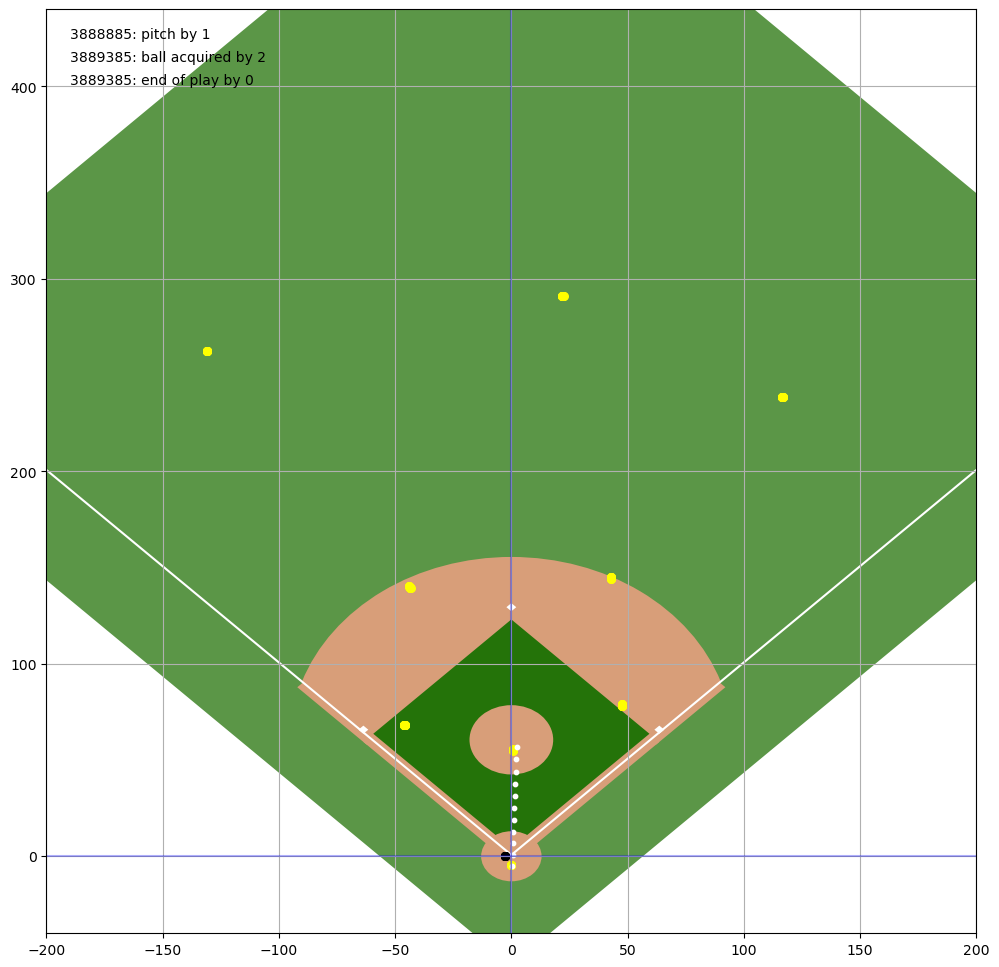

In [134]:
bf_1902_14.clear_plot()

play_id = bf_1902_14.game_obj.get_pid_from_ppg(119)

bf_1902_14.plot_all_components(play_id=play_id)
bf_1902_14.fig


#bf_1902_14.create_gif(play_id=play_id, tag="--6-3 out at first")

## SO THIS WAY WORKS PRETTY WELL! Why are some of those plays not showing up though?

- ugh, its because game info is wrong!
    - 119 should have been updated? 

In [124]:
bf_1902_14.game_obj.get_ppg_from_pid(118)

118

In [123]:
this_half_inning

,game_str,home_team,away_team,at_bat,play_per_game,inning,top_bottom_inning,pitcher,catcher,first_base,second_base,third_base,shortstop,left_field,center_field,right_field,batter,first_baserunner,second_baserunner,third_baserunner,n_br,prev_outs,this_play_outs,trust_this_play,Batter,Runner 1st,Runner 2nd,Runner 3rd,player_pos_and_info_agree,valid_half,trust_this_half,is_out_at_first
0,1902_14_TeamMK_TeamB,TeamB,TeamMK,1.0,1,1,Top,1493,2925,2774,1650,2818,1607,1930,2183,1124,4264,0,0,0,0,0.0,0.0,1,1,0,0,0,1,1,1,0
1,1902_14_TeamMK_TeamB,TeamB,TeamMK,1.0,2,1,Top,1493,2925,2774,1650,2818,1607,1930,2183,1124,4264,0,0,0,0,0.0,0.0,1,1,0,0,0,1,1,1,0
2,1902_14_TeamMK_TeamB,TeamB,TeamMK,1.0,3,1,Top,1493,2925,2774,1650,2818,1607,1930,2183,1124,4264,0,0,0,0,0.0,1.0,1,1,0,0,0,1,1,1,0
3,1902_14_TeamMK_TeamB,TeamB,TeamMK,2.0,4,1,Top,1493,2925,2774,1650,2818,1607,1930,2183,1124,5191,0,0,0,0,1.0,0.0,1,1,0,0,0,1,1,1,0
4,1902_14_TeamMK_TeamB,TeamB,TeamMK,2.0,5,1,Top,1493,2925,2774,1650,2818,1607,1930,2183,1124,5191,0,0,0,0,1.0,0.0,1,1,0,0,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,1902_14_TeamMK_TeamB,TeamB,TeamMK,77.0,293,9,Top,1516,2925,2774,1650,2818,1607,1930,2183,1124,9691,0,0,0,0,1.0,0.0,1,1,0,0,0,1,1,1,0
286,1902_14_TeamMK_TeamB,TeamB,TeamMK,78.0,294,9,Top,1516,2925,2774,1650,2818,1607,1930,2183,1124,9691,0,0,0,0,1.0,0.0,1,1,0,0,0,1,1,1,0
287,1902_14_TeamMK_TeamB,TeamB,TeamMK,78.0,295,9,Top,1516,2925,2774,1650,2818,1607,1930,2183,1124,9691,0,0,0,0,1.0,0.0,1,1,0,0,0,1,1,1,0
288,1902_14_TeamMK_TeamB,TeamB,TeamMK,78.0,296,9,Top,1516,2925,2774,1650,2818,1607,1930,2183,1124,9691,0,0,0,0,1.0,1.0,1,1,0,0,0,1,1,1,0


In [125]:
this_half_inning.loc[
    (this_half_inning["play_per_game"] == 118),
    :
]

,game_str,home_team,away_team,at_bat,play_per_game,inning,top_bottom_inning,pitcher,catcher,first_base,second_base,third_base,shortstop,left_field,center_field,right_field,batter,first_baserunner,second_baserunner,third_baserunner,n_br,prev_outs,this_play_outs,trust_this_play,Batter,Runner 1st,Runner 2nd,Runner 3rd,player_pos_and_info_agree,valid_half,trust_this_half,is_out_at_first
112,1902_14_TeamMK_TeamB,TeamB,TeamMK,33.0,118,5,Top,1493,2925,2774,1650,2818,1607,1930,2183,1124,4317,0,0,0,0,0.0,0.0,1,1,0,0,0,1,1,0,0


In [130]:
game_events_1902_14.loc[
    game_events_1902_14["play_per_game"] == 118
]

,game_str,play_id,at_bat,play_per_game,timestamp,player_position,event_code,event,next_event_code,next_event,next_event_ts,prev_event_code,prev_event,prev_event_ts,xy_throw_angle,elevation_throw_angle,throw_velo,batter_dist_to_first,thrower_x,thrower_y,ball_position_x,ball_position_y,ball_position_z,batter_x,batter_y,player_id
466,1902_14_TeamMK_TeamB,118,33.0,118,3754185,1,1,pitch,4.0,ball hit into play,3754635.0,NaN,NaN,NaN,NaN,NaN,NaN,91.117759,NaN,NaN,-2.871120,52.089300,5.461560,-2.6343,1.1079,1493
467,1902_14_TeamMK_TeamB,118,33.0,118,3754635,10,4,ball hit into play,16.0,ball bounce,3754985.0,1.0,pitch,3754185.0,NaN,NaN,NaN,91.117759,NaN,NaN,0.569793,2.905917,2.518968,-2.6343,1.1079,4317
468,1902_14_TeamMK_TeamB,118,33.0,118,3754985,255,16,ball bounce,16.0,ball bounce,3755435.0,4.0,ball hit into play,3754635.0,NaN,NaN,NaN,91.117759,NaN,NaN,-8.208150,44.402100,0.236789,-2.6343,1.1079,NaN
469,1902_14_TeamMK_TeamB,118,33.0,118,3755435,255,16,ball bounce,16.0,ball bounce,3755885.0,16.0,ball bounce,3754985.0,NaN,NaN,NaN,86.806125,NaN,NaN,-16.896060,85.343400,0.527634,0.4851,4.0845,NaN
470,1902_14_TeamMK_TeamB,118,33.0,118,3755885,255,16,ball bounce,16.0,ball bounce,3756335.0,16.0,ball bounce,3755435.0,NaN,NaN,NaN,79.648011,NaN,NaN,-23.539830,117.057600,-0.449286,5.6352,9.0567,NaN
471,1902_14_TeamMK_TeamB,118,33.0,118,3756335,255,16,ball bounce,2.0,ball acquired,3756435.0,16.0,ball bounce,3755885.0,NaN,NaN,NaN,70.929359,NaN,NaN,-29.671050,144.467400,-0.062400,11.8659,15.1581,NaN
472,1902_14_TeamMK_TeamB,118,33.0,118,3756435,6,2,ball acquired,3.0,throw (ball-in-play),3757135.0,16.0,ball bounce,3756335.0,NaN,NaN,NaN,68.776566,NaN,NaN,-30.898500,149.084700,0.000000,13.4019,16.6674,1607
473,1902_14_TeamMK_TeamB,118,33.0,118,3757135,6,3,throw (ball-in-play),2.0,ball acquired,3758535.0,2.0,ball acquired,3756435.0,4.040284,9.458043,65.34372,52.064888,-24.5556,152.0655,-27.107700,150.849300,3.539130,25.3221,28.3902,1607
474,1902_14_TeamMK_TeamB,118,33.0,118,3758535,3,2,ball acquired,5.0,end of play,3759335.0,3.0,throw (ball-in-play),3757135.0,NaN,NaN,NaN,14.768955,NaN,NaN,62.931900,68.499300,1.683105,52.5435,53.8929,2774
475,1902_14_TeamMK_TeamB,118,33.0,118,3759335,0,5,end of play,NaN,NaN,NaN,2.0,ball acquired,3758535.0,NaN,NaN,NaN,5.601808,NaN,NaN,NaN,NaN,NaN,67.9821,67.1784,NaN


In [126]:
game_info_1902_14.loc[
    (game_info_1902_14["inning"] == 5) &
    (game_info_1902_14["top_bottom_inning"] == "Top"),
    :
]



,game_str,home_team,away_team,at_bat,play_per_game,inning,top_bottom_inning,pitcher,catcher,first_base,second_base,third_base,shortstop,left_field,center_field,right_field,batter,first_baserunner,second_baserunner,third_baserunner,n_br,prev_outs,this_play_outs,trust_this_play,Batter,Runner 1st,Runner 2nd,Runner 3rd,player_pos_and_info_agree,valid_half,trust_this_half,is_out_at_first
112,1902_14_TeamMK_TeamB,TeamB,TeamMK,33.0,118,5,Top,1493,2925,2774,1650,2818,1607,1930,2183,1124,4317,0,0,0,0,0.0,0.0,1,1,0,0,0,1,1,0,NaN
113,1902_14_TeamMK_TeamB,TeamB,TeamMK,34.0,119,5,Top,1493,2925,2774,1650,2818,1607,1930,2183,1124,4317,0,0,0,0,0.0,1.0,1,1,0,0,0,1,1,0,NaN
114,1902_14_TeamMK_TeamB,TeamB,TeamMK,34.0,120,5,Top,1493,2925,2774,1650,2818,1607,1930,2183,1124,8742,0,0,0,0,1.0,0.0,1,1,0,0,0,1,1,0,NaN
115,1902_14_TeamMK_TeamB,TeamB,TeamMK,35.0,121,5,Top,1493,2925,2774,1650,2818,1607,1930,2183,1124,8742,0,0,0,0,1.0,0.0,1,1,0,0,0,1,1,0,NaN
116,1902_14_TeamMK_TeamB,TeamB,TeamMK,35.0,122,5,Top,1493,2925,2774,1650,2818,1607,1930,2183,1124,4264,8742,0,0,1,1.0,0.0,0,1,0,0,0,0,1,0,NaN
117,1902_14_TeamMK_TeamB,TeamB,TeamMK,36.0,123,5,Top,1493,2925,2774,1650,2818,1607,1930,2183,1124,4264,8742,0,0,1,1.0,0.0,1,1,1,0,0,1,1,0,NaN
118,1902_14_TeamMK_TeamB,TeamB,TeamMK,36.0,124,5,Top,1493,2925,2774,1650,2818,1607,1930,2183,1124,4264,8742,0,0,1,1.0,0.0,1,1,1,0,0,1,1,0,NaN
119,1902_14_TeamMK_TeamB,TeamB,TeamMK,36.0,125,5,Top,1493,2925,2774,1650,2818,1607,1930,2183,1124,4264,8742,0,0,1,1.0,0.0,1,1,1,0,0,1,1,0,NaN
120,1902_14_TeamMK_TeamB,TeamB,TeamMK,36.0,126,5,Top,1493,2925,2774,1650,2818,1607,1930,2183,1124,4264,8742,0,0,1,1.0,0.0,1,1,1,0,0,1,1,0,NaN
121,1902_14_TeamMK_TeamB,TeamB,TeamMK,36.0,127,5,Top,1493,2925,2774,1650,2818,1607,1930,2183,1124,4264,8742,0,0,1,1.0,0.0,1,1,1,0,0,1,1,0,NaN


In [132]:
this_play_events = game_events_1902_14.loc[
    (game_events_1902_14["play_per_game"] == 118),
    :
]

    

## compute the distance the ball is away from first when acquire
any_acqs_near_first = any(this_play_events.loc[
    (this_play_events["event"] == "ball acquired") &
    (this_play_events["player_position"] == 3),
    ["ball_position_x", "ball_position_y"]
].apply(lambda row: np.sqrt((row["ball_position_x"] - FIRST_BASE_COORDS[0])**2 +
                            (row["ball_position_y"] - FIRST_BASE_COORDS[1])**2)
                            , axis=1) < 15
)   

In [133]:
any_acqs_near_first

True